# 🐵 Face Expression Classification

[Face Expression Classification - Repo | officialpm](https://github.com/officialpm/Face-Expression-Classification-CNN)

####**`💚 Developed by`** [Nikita ](https://github.com/officialpm)

<div>
<a href="https://twitter.com/Nikitacodes">
  <img   align="left" alt="Nikita | Twitter" width="22px"  src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/twitter.svg" />
</a>
<a href="https://www.linkedin.com/in/Nikitadmaniar/">
  <img align="left" alt="Nikita's LinkdeIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />
</a>
<a href="https://t.me/Nikitamaniar">
  <img align="left" alt="Nikita's Telegram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/telegram.svg" />
</a>
<a href="https://www.instagram.com/Nikita/">
  <img align="left" alt="Nikita's Instagram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/instagram.svg" />
</a>
</div>
<br/>


---


## `• Problem`

Identifying the face expression of a human, given an image of him/her.

## `• Data`
  
Data is taken from Kaggle's Facial Expression Recognition Challenge:
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


## `• Evaluation`

Evaluation is done based on accuracy and loss between predicted expression and actual expression.

## `• Features`

Some information about the data:
* We're dealing with images(unstructured data), so its better we use deep learning / transfer learning.
* Dataset has **3** columns namely emotions, picture, and usage(Training/Testing).
* Dataset has **35887** rows(images).
* There are **28709** training images (with column value as Training).
* There are **3589** testing images (with column value as PublicTest).
* Dataset has **7 classes** (emotions).
  * 0 -> Angry
  * 1 -> Disgust
  * 2 -> Fear
  * 3 -> Happy
  * 4 -> Sad
  * 5 -> Surprise
  * 6 -> Neutral


## Initializing

In [2]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [4]:
!git-lfs clone https://github.com/officialpm/Face-Expression-Classification-CNN
!git clone https://github.com/nikitavsingh/image_classification.git

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
fatal: destination path 'Face-Expression-Classification-CNN' already exists and is not an empty directory.
Error(s) during clone:
git clone failed: exit status 128
Cloning into 'image_classification'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [8]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import *
from keras.layers import BatchNormalization
base_path = "Face-Expression-Classification-CNN"
base_path2 = "image_classification"
%matplotlib inline

### Check GPU

In [9]:
# Check for GPU availability
print("Hey Parth Maniar, GPU ", "available :) !!" if tf.config.list_physical_devices("GPU") else "not available :(")

Hey Parth Maniar, GPU  available :) !!


##Data

In [10]:
raw_df = pd.read_csv(f"{base_path}/Data/fer2013.csv")

## Creating Train and Test Datasets

### Initialize the total number of classes

In [11]:
# Initialize the total number of classes
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral

### Initialize training and test datasets

In [12]:
def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y) #NORMALIZE
    return X, Y

In [13]:
X, Y = getData(f"{base_path}/Data/fer2013.csv")
num_class = len(set(Y))
print(num_class)

7


In [14]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)


### Reshape the inputs

In [16]:
# Reshape each value from 1D(28709) to 3D(48,48,1)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

32298 train samples
3589 test samples


In [17]:
X_train.shape

(32298, 48, 48, 1)

## Construct a CNN (Convolutional Neural Network)

Here we can start with Keras-Sequential as our base model.
https://keras.io/api/models/sequential/

### Create a model

In [18]:
width, height = 48, 48
batch_size = 64
num_features = 64

In [21]:
from tensorflow.keras.optimizers import Adam
model = Sequential()

# 1st Convolutional Layer 
model.add(Conv2D(256, kernel_size=(3, 3), input_shape=(width, height, 1), data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# 2nd Convolutional Layer 
model.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 3rd Convolutional Layer 
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4th Convolutional Layer 
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 5th Convolutional Layer 
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 6th Convolutional Layer 
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#flatten
model.add(Flatten())

#1st Dense Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2nd Dense Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))

#3rd Dense Layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Output
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 256)       2560      
                                                                 
 batch_normalization_9 (Batc  (None, 46, 46, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 46, 46, 256)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 256)       590080    
                                                                 
 batch_normalization_10 (Bat  (None, 46, 46, 256)      1024      
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 46, 46, 256)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Adding Early Stopping

In [22]:
es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

## Batch Wise Data

In [23]:
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [24]:
dataGEN = data_generator.flow(X_train, y_train, batch_size)

## Fit the model

In [25]:
# Assign number of epochs
epochs = 70 #@param{type:"slider", min:0, max:250, step:10}

In [33]:
modelPath=f'{base_path}/Models/Face_Expression_Classfication_v2_model.h5' # save model at this location after each epoch
history = model.fit_generator(  dataGEN,
                                steps_per_epoch=len(X_train) / batch_size,
                                epochs=epochs,
                                verbose=1, 
                                callbacks = [es, ModelCheckpoint(filepath=modelPath)],
                                validation_data=(X_test,y_test))

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


504/504 [==============================] - 56s 112ms/step - loss: 0.7988 - accuracy: 0.7003 - val_loss: 0.9801 - val_accuracy: 0.6486
Epoch 2/70
504/504 [==============================] - 52s 103ms/step - loss: 0.7859 - accuracy: 0.7049 - val_loss: 1.0671 - val_accuracy: 0.6160
Epoch 3/70
504/504 [==============================] - 53s 105ms/step - loss: 0.7738 - accuracy: 0.7095 - val_loss: 0.9455 - val_accuracy: 0.6576
Epoch 4/70
504/504 [==============================] - 52s 103ms/step - loss: 0.7606 - accuracy: 0.7143 - val_loss: 0.9679 - val_accuracy: 0.6534
Epoch 5/70
504/504 [==============================] - 52s 102ms/step - loss: 0.7514 - accuracy: 0.7187 - val_loss: 1.0039 - val_accuracy: 0.6461
Epoch 6/70
504/504 [==============================] - 52s 102ms/step - loss: 0.7369 - accuracy: 0.7230 - val_loss: 0.9767 - val_accuracy: 0.6551
Epoch 7/70
504/504 [==============================] - 52s 102ms/step - loss: 0.7300 - accuracy: 0.7276 - val_loss: 1.0147 - val_accuracy: 0.6

## Load the saved model

We can load the model in two ways:
* Using Keras `load_model()`
* Using Pickle `load()`

The loaded model can be directly used of prediction.

In [34]:
import pickle

# Load a model using Keras or Pickle

def load_model(load_method='Keras'):
  model = None
  if load_method == 'Keras':
    # Method 1: Using Keras
    model = keras.models.load_model(modelPath)
  elif load_method == 'Pickle':
    # Method 2: Using Pickle
    with open(modelPath, 'rb') as f:
      model = pickle.load(f)
  
  print("Model Loaded.")
  return model

In [35]:
loaded_model = load_model(load_method='Keras')

Model Loaded.


## Evaluate the trained model

Use the `evaluate()` method to evalute the trained model against train and test dataset

In [36]:
train_score = loaded_model.evaluate(X_train, y_train, verbose=1)
print(f"Train loss : {train_score[0]}")
print(f"Train accuracy : {train_score[1]}")
test_score = loaded_model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss : {test_score[0]}")
print(f"Test accuracy : {test_score[1]}")

1010/1010 [==============================] - 18s 17ms/step - loss: 0.6921 - accuracy: 0.7385
Train loss : 0.6920667290687561
Train accuracy : 0.7384667992591858
113/113 [==============================] - 2s 18ms/step - loss: 0.9455 - accuracy: 0.6576
Test loss : 0.9454700350761414
Test accuracy : 0.6575647592544556


### Function to analyze and plot the prediction results

In [37]:
def analyze_emotion(emotions):
  label_values = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
  y_seq = np.arange(len(label_values))
  fig, ax = plt.subplots()
  ax.bar(y_seq, emotions, align='center', alpha=0.5)
  ax.set_xticks(y_seq)
  ax.set_xticklabels(label_values, color='black')
  ax.set_ylabel("Percentage", color='black')
  ax.set_title("Emotion", color='black')
  plt.show()

### Confusion Matrix

Plotting a confusin matrix between predicted labels and truth(ground) labels

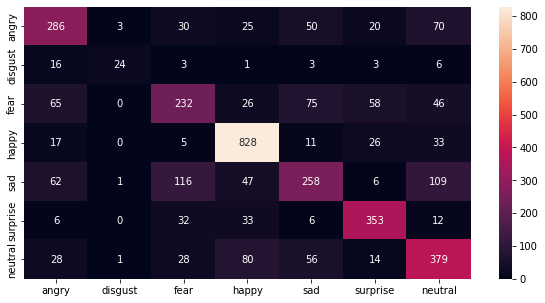

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

label_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
label_values = [0,1,2,3,4,5,6]

# Make a predictions predictions list
y_preds = loaded_model.predict(X_test)
y_preds_mod, y_test_mod = [], []

for pred in y_preds:
  y_preds_mod.append(np.argmax(pred))

for truth in y_test:
  y_test_mod.append(np.argmax(truth))

# Create a confusion matrix
cm = confusion_matrix(y_test_mod, y_preds_mod, labels=label_values)

# Visualize the confusion matrix using Seaborn heatmap
df_cm = pd.DataFrame(cm,
                     index=label_names,
                     columns=label_names)
plt.figure(figsize=(10,5))
sn.heatmap(df_cm, annot=True, fmt='g');

## Testing with custom (external) data


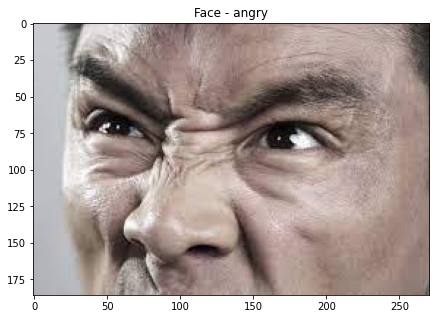

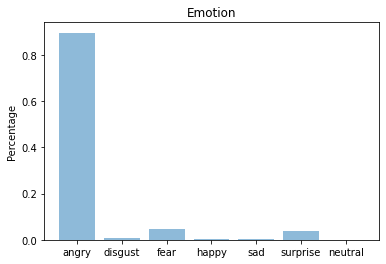

In [41]:
file = f"{base_path}/Data/Images/45627498.jpg"
file = f"{base_path2}/images/1.jpg"
actual_image = image.load_img(file)
img = image.load_img(file, color_mode='grayscale', target_size=(48,48))

X_custom = image.img_to_array(img)
X_custom = np.expand_dims(X_custom, axis=0)

X_custom /= 255

y_custom = loaded_model.predict(X_custom)

m=0.000000000000000000001
a=y_custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(actual_image)
ax.set_title(f'Face - {label_names[ind]}');

analyze_emotion(y_custom[0])